In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Reshape,UpSampling2D,MaxPooling2D,BatchNormalization,AveragePooling2D

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape , y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape , y_test.shape

((10000, 32, 32, 3), (10000, 1))

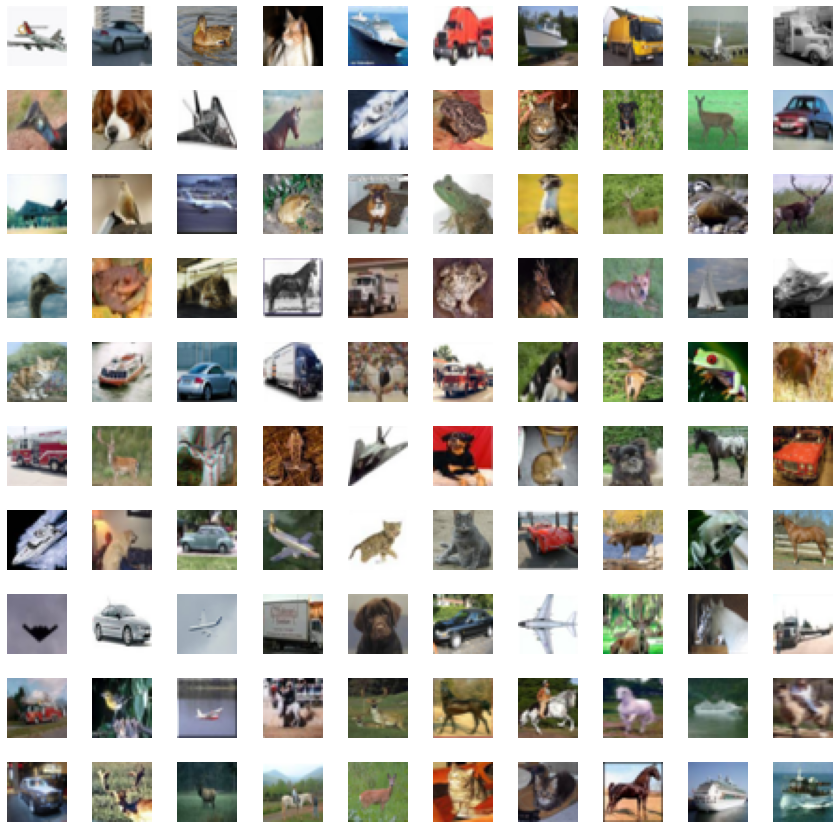

In [7]:
width = 10
height = 10

fig,axes = plt.subplots(height,width,figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0,width*height):
  index = np.random.randint(0,50000)
  axes[i].imshow(X_train[index],cmap='gray')
  # axes[i].set_title(classes[y_train[index]],fontsize=8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)  

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [12]:
X_train = X_train.reshape((len(X_train),32,32,3))
X_test = X_test.reshape((len(X_test),32,32,3))

In [19]:
autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters=64 , kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2,2),padding='same'))

autoencoder.add(Conv2D(filters=32 , kernel_size=(3,3), activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2,2),padding='same'))

autoencoder.add(Conv2D(filters=16 , kernel_size=(3,3), activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D(pool_size=(2,2),padding='same'))


# Decoder
autoencoder.add(Conv2D(filters=16 , kernel_size=(3,3), activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(filters=32 , kernel_size=(3,3), activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(filters=16 , kernel_size=(3,3), activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))



autoencoder.add(Conv2D(filters=3,kernel_size=(3,3),activation='sigmoid',padding='same'))

autoencoder.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                                 
                                                                 
 average_pooling2d_3 (Averag  (None, 15, 15, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_12 (Conv2D)          (None, 15, 15, 32)        18464     
                                                                 
 batch_normalization_5 (Batc  (None, 15, 15, 32)       128       
 hNormalization)                                                 
                                                      

In [20]:
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train,X_train,epochs=50)

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_5').output)
encoder.summary()

In [ ]:
coded_test_images = encoder.predict(X_test)


In [ ]:
coded_test_images.shape

In [ ]:
decoded_test_image = autoencoder.predict(X_test)
decoded_test_image.shape

In [ ]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0],size=n_images)
plt.figure(figsize=(10,10))

for i, image_index in enumerate(test_images):
  # Orignal Image
  ax = plt.subplot(10,10,i+1)
  plt.imshow(X_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  # Encoded Image
  ax = plt.subplot(10,10,i+1 + n_images)
  plt.imshow(X_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())

  # Decoded Image
  ax = plt.subplot(10,10,i+1 + n_images*2)
  plt.imshow(X_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())